# Compare Compute Time for Tensor Density

In [13]:
MAX_EPOCH = 5
RANK = 2

In [14]:
import scipy.io as spio
import numpy as np
from tqdm import tqdm
from pyCP_APR import CP_APR

## RUN CP-APR Numpy Sparse 

In [15]:
sparse_tensor_times = list()

In [16]:
cp_apr = CP_APR(n_iters=MAX_EPOCH, verbose=0, method='numpy')

for ii in tqdm(range(20)):
    X = np.ones((20, 20, 20))
    X[:,list(range(0,ii))] = 0
    np.random.shuffle(X)
    coords = np.argwhere(X != 0)
    values = X[np.nonzero(X)]
    
    _ = cp_apr.fit(coords=coords, values=values, rank=RANK, method='numpy')
    sparse_tensor_times.append(cp_apr.model.exec_time)

100%|██████████| 20/20 [00:00<00:00, 21.05it/s]


## Run CP-APR PyTorch CPU

In [17]:
sparse_pytorch_cpu_times = list()

In [18]:
cp_apr = CP_APR(n_iters=MAX_EPOCH, verbose=0, method='torch', device='cpu')

for ii in tqdm(range(20)):
    X = np.ones((20, 20, 20))
    X[:,list(range(0,ii))] = 0
    np.random.shuffle(X)
    coords = np.argwhere(X != 0)
    values = X[np.nonzero(X)]
    
    _ = cp_apr.fit(coords=coords, values=values, rank=RANK)
    sparse_pytorch_cpu_times.append(cp_apr.model.exec_time)

100%|██████████| 20/20 [00:01<00:00, 14.66it/s]


## PyTorch GPU

In [19]:
sparse_pytorch_gpu_times = list()

In [20]:
cp_apr = CP_APR(n_iters=MAX_EPOCH, verbose=0, method='torch', device='gpu')

for ii in tqdm(range(20)):
    X = np.ones((20, 20, 20))
    X[:,list(range(0,ii))] = 0
    np.random.shuffle(X)
    coords = np.argwhere(X != 0)
    values = X[np.nonzero(X)]
    
    _ = cp_apr.fit(coords=coords, values=values, rank=RANK)
    sparse_pytorch_gpu_times.append(cp_apr.model.exec_time)

100%|██████████| 20/20 [00:01<00:00, 14.45it/s]


# Plot

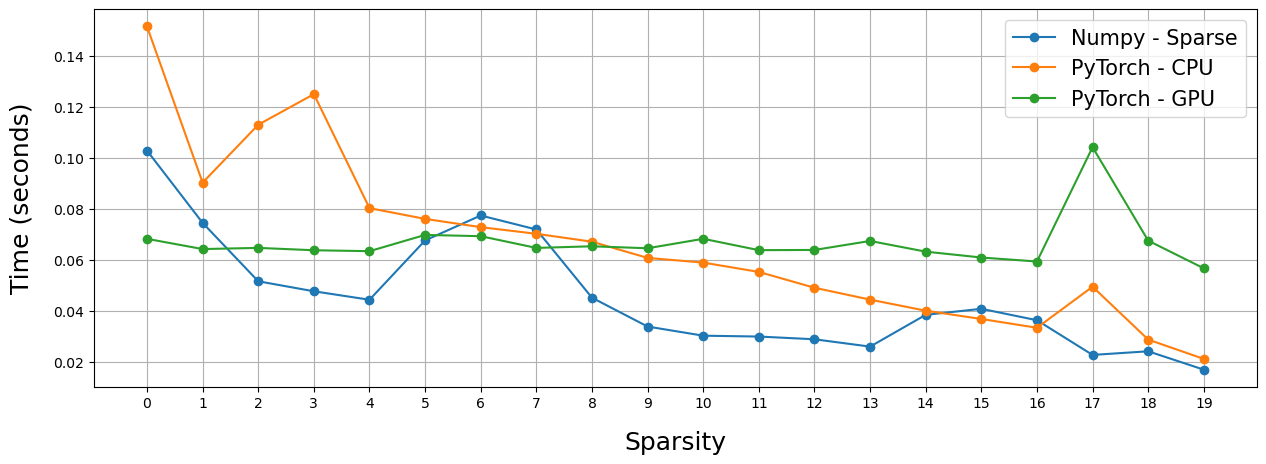

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt 

x = range(0, 20)
plt.figure(figsize=(15,5), dpi=100)

plt.plot(x, sparse_tensor_times, marker='o', label='Numpy - Sparse')
plt.plot(x, sparse_pytorch_cpu_times, marker='o', label='PyTorch - CPU')
plt.plot(x, sparse_pytorch_gpu_times, marker='o', label='PyTorch - GPU')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Sparsity', fontsize=18, labelpad=14)
plt.ylabel('Time (seconds)', fontsize=18, labelpad=14)
plt.legend(loc="upper right", prop={'size': 15})
plt.grid(True)

plt.show()